In [3]:
import random
import torch
from d2l import torch as d2l


### 生成数据集

In [4]:
def sys_data(w,b,num_ex): #@save
    """生成 y=Xw+b+噪音"""
    X = torch.normal(0,1,(num_ex,len(w)))
    y = torch.matmul(X,w) + b
    y += torch.normal(0,0.01,y.shape)
    return X , y.reshape(-1,1)

w = torch.tensor([2,-3.4])
b = 4.2
features, labels = sys_data(w,b,1000)

In [5]:
print('features:',features[0],'\nlabel:',labels[0])

features: tensor([-0.0095,  0.4815]) 
label: tensor([2.5361])


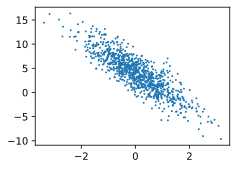

In [6]:
d2l.set_figsize()
d2l.plt.scatter(features[:,1].detach().numpy(),labels.detach().numpy(),1)

## 读取数据集

In [7]:
def data_iter(batch_size, features, labels):
    num_exp = len(features)
    indices = list(range(num_exp))
    # 这些样本是随机读取的，没有特定的顺序
    random.shuffle(indices)
    for i in range(0,num_exp,batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size,num_exp)]
        )
        yield features[batch_indices],labels[batch_indices]

In [8]:
batch_size = 10 
for X, y in data_iter(batch_size,features,labels):
    print(X,'\n',y)
    break

tensor([[ 1.5555,  0.9797],
        [-0.5989, -0.3190],
        [-0.0788, -0.5053],
        [-1.0927, -0.8159],
        [ 0.3508,  0.5614],
        [-0.2481, -0.3886],
        [-0.3277,  0.9698],
        [ 0.6392,  0.0378],
        [-0.1043,  0.4709],
        [-1.1197,  0.2797]]) 
 tensor([[3.9908],
        [4.1010],
        [5.7358],
        [4.7877],
        [2.9925],
        [5.0244],
        [0.2429],
        [5.3511],
        [2.3814],
        [1.0186]])


## 初始化模型参数

In [44]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

## 定义模型

In [45]:
def linreg(X,w,b):  #@save
    """线性回归模型"""
    return torch.matmul(X,w) + b

## 定义损失函数

In [46]:
def loss(y_hat, y):  #@save
    """均方损失"""
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

## 定义优化代码

In [47]:
def sgd(params, lr, batch_size): #@save  #params为参数是一个list
    """小批量随机梯度下降"""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

## 训练

In [50]:
lr = 0.03
num_epochs = 3
net = linreg
loss = loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size,features,labels):
        l = loss(net(X, w, b), y)  # X和y的小批量损失
        # 因为l形状是(batch_size,1),而不是一个标量。l中的所有元素被加到一起，
        # 并以此计算关于[w,b]的梯度
        l.sum().backward()
        sgd([w,b],lr,batch_size) # 使用参数的梯度更新参数
    with torch.no_grad():
        train_l = loss(net(features,w,b),labels)
        print(f'epoch{epoch + 1},loss {float(train_l.mean()):f}')
            

epoch1,loss 0.000050
epoch2,loss 0.000050
epoch3,loss 0.000050


## 误差值

In [ ]:
print(f'w的估计误差：{true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差：{true_b -  b}')